# 1. Import Liabrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2.Data Import

In [2]:
data_mo=pd.read_csv("data_mob.csv")
data_comp=pd.read_csv("data_comp.csv")

In [3]:
data=pd.concat([data_mo,data_comp])

In [4]:
data.to_csv("rating.csv",index=False)

In [5]:
data=pd.read_csv("rating.csv")

In [6]:
data.drop("Unnamed: 0",inplace=True,axis=1)

In [7]:
data

,Review,Rating
0,This s v.beautiful product....I like ths pop u...,5Star
1,accha hai,5Star
2,Nice\nI mean ok ok,3Star
3,Awesome,5Star
4,Best buy at this price! The display quality is...,5Star
...,...,...
29989,The cover of these set has cut on it and 3 of ...,1Star
29990,It's expensive and the Colors quantity is just...,1Star
29991,Good,1Star
29992,As compared to the rate the colors are too sma...,1Star


In [8]:
data.reset_index(inplace=True,drop=True)

# 3.Checking Null Values in Dataset

In [9]:
data.isnull().sum()

Review    47
Rating     0
dtype: int64

**As we can see there are 47 null value in dataset,so moving ahead we will remove those observation from dataset**

In [10]:
data.dropna(subset=["Review"],inplace=True)

In [11]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [12]:
data.reset_index(drop=True,inplace=True)

In [13]:
data.shape

(29947, 2)

**As we can see that null value observation has been removed from dataset.**

# 4. Data Cleaning & PreProcessing

**As we have seen that in dataset our text data is not profer format, so we will apply various techinque to remove those, also we will apply some NLP algorithm to deal with our text data.**

In [14]:
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet


## 4.1 Removing extra character

In [15]:
pattern = r"\&\#[0-9]+\;"

data["preprocessed"] = data["Review"].str.replace(pat=pattern, repl=" ", regex=True)

In [16]:
data["preprocessed"]

0        This s v.beautiful product....I like ths pop u...
1                                                accha hai
2                                       Nice\nI mean ok ok
3                                                  Awesome
4        Best buy at this price! The display quality is...
                               ...                        
29942    The cover of these set has cut on it and 3 of ...
29943    It's expensive and the Colors quantity is just...
29944                                                 Good
29945    As compared to the rate the colors are too sma...
29946                                                  Bad
Name: preprocessed, Length: 29947, dtype: object

## 4.2 Removing Punctuations

In [17]:
pattern = r"[^\w\s]"
data["preprocessed"] = data["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

## 4.3 Converting to lower case

In [18]:
data["preprocessed"]=data["preprocessed"].str.lower()

## 4.4 Removing stop words

In [19]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ")
                                          if token not in stop_words])

In [20]:
data["preprocessed"] = data["preprocessed"].apply(remove_stop_words)

**Here we have applied stopwords to remove those from our dataset.**

## 4.5 Removing extra space

In [21]:
pattern = r"[\s]+"

data["preprocessed"] = data["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)


## 4.6 Removing digit from sentences

In [22]:
pattern = r"[0-9]+"

data["preprocessed"] = data["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

## 4.7 Apply Tokenization and Lemmatization Techinque

In [23]:
data["preprocessed"][0]

'v beautiful product like ths pop button worth money '

In [24]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [25]:
def lemmatize_doc(document):
    lemmatized_list=[]
    tokenized_sent=sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation=re.sub(r"[`'\",.!?()]"," ",sentence)
        tokenized_word=word_tokenize(no_punctuation)
        lemmatized=[lemma.lemmatize(word) for word in tokenized_word]
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

In [26]:
data["preprocessed"]=data["preprocessed"].apply(lambda row: lemmatize_doc(row))

**In above code we have applied sentence and word tokenization to spilt the text data into requrire format for our model.Also we have used lemmatized algorithm to get the base word and keep actual meaning of the word.**

# 5. Creating Vocablulary

**The vocabulary is the key-value pairs of all the unique tokens in our customer review data. Each token is assigned a lookup ID.**

In [27]:
corpora = data["preprocessed"].values
tokenized=[corpus.split(" ") for corpus in corpora]

In [28]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: beautiful
ID: 1, Token: button
ID: 2, Token: like
ID: 3, Token: money
ID: 4, Token: pop
ID: 5, Token: product
ID: 6, Token: th
ID: 7, Token: v
ID: 8, Token: worth
ID: 9, Token: accha
ID: 10, Token: hai
ID: 11, Token: i
ID: 12, Token: mean
ID: 13, Token: nice
ID: 14, Token: ok
ID: 15, Token: awesome
ID: 16, Token: ahead
ID: 17, Token: amazing
ID: 18, Token: available
ID: 19, Token: best
ID: 20, Token: buy
ID: 21, Token: camera
ID: 22, Token: come
ID: 23, Token: complaint
ID: 24, Token: display
ID: 25, Token: gb
ID: 26, Token: go
ID: 27, Token: phone
ID: 28, Token: price
ID: 29, Token: quality
ID: 30, Token: ram
ID: 31, Token: difficult
ID: 32, Token: good
ID: 33, Token: minute
ID: 34, Token: one
ID: 35, Token: ordering
ID: 36, Token: soldout
ID: 37, Token: value
ID: 38, Token: within
ID: 39, Token: mobile
ID: 40, Token: battry
ID: 41, Token: prive
ID: 42, Token: also
ID: 43, Token: average
ID: 44, Token: battery
ID: 45, Token: bought
ID: 46, Token: combo
ID: 47, Token: emp

# 6.Count-based Feature Engineering

**As we know the input data for machine learning model must be numberic so here we will vectorize our text input into numberical value with the help of some NLP algorithm.**

## 6.1 Bag of Words Model

**The classical approach in expressing text as a set of features is getting the token frequency. Each entry to the dataframe is a document while each column corresponds to every unique token in the entire corpora.Here we will know that how many times a word appears in the document.**

In [29]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: beautiful, Frequency: 1
Word: button, Frequency: 1
Word: like, Frequency: 1
Word: money, Frequency: 1
Word: pop, Frequency: 1
Word: product, Frequency: 1
Word: th, Frequency: 1
Word: v, Frequency: 1
Word: worth, Frequency: 1


## 6.2 TF-IDF Model

**The Term Frequency-Inverse Document Frequency (TF-IDF) approach assigns continuous values instead of binary numbers for the token frequency. Words that appear frequently overall tend to not establish saliency in a document, and are thus weighted lower. Words that are unique to some documents tend to help distinguish it from the rest and are thus weighted higher. The tfidf weighting is based on our bow variable.**

In [30]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: beautiful, Weight: 0.466
Word: button, Weight: 0.273
Word: like, Weight: 0.150
Word: money, Weight: 0.209
Word: pop, Weight: 0.508
Word: product, Weight: 0.092
Word: th, Weight: 0.373
Word: v, Weight: 0.405
Word: worth, Weight: 0.270


# 7.Word Embedding for Feature Engineering

**The disadvantage of count-based techniques is that without regard to word sequence and sentence structure, the semantics get lost. The Word2Vec technique, on the other hand, actually embeds meaning in vectors by quantifying how often a word appears within the particular range of a given set of other words.
A context window the span of context_size slides across every document one token at a time. In each step, the center word is described by its adjacent words and the probability that the token appears together with the others is expressed in feature_size dimensions. Since the minimum word requirement is set to 1, every token in the corpora is embedded in the Word2Vec model.**

In [31]:
len(tokenized)

29947

In [32]:
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

word_vec= word2vec.Word2Vec(tokenized, min_count=1, seed=42)

In [33]:
word_vec

In [34]:
word=word_vec.wv.key_to_index

In [35]:
word_vec_unpack = [(word, idx) for ( word, idx) in word.items()]

In [36]:
tokens, indexes = zip(*word_vec_unpack)

In [37]:
word_vec_data=pd.DataFrame(index=tokens,columns=indexes)

In [38]:
word_vec_df = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=tokens)

display(word_vec_df)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
good,-1.091897,-0.512510,0.231506,0.336609,1.005048,0.440355,-0.357036,0.876452,-1.511787,-1.285634,...,-0.070405,-0.485927,1.168319,0.668531,0.153705,0.386780,1.108599,0.255725,-0.357790,-0.634701
product,1.181877,0.704428,0.287887,0.670030,0.216797,0.986986,0.242412,2.021918,-1.059775,-1.614579,...,-0.909287,-0.033779,-0.520381,-0.651174,-1.015253,-0.538228,1.689428,-0.244979,-0.078368,1.029790
quality,-0.989918,1.668956,1.306105,1.144837,1.337920,-1.698373,2.042885,2.026644,-3.126457,-0.801625,...,1.279230,-0.487141,1.026382,-1.325919,-1.084417,-0.124336,1.090162,-2.192710,-0.472186,-1.261786
one,1.010405,0.571604,-0.460683,-0.756521,-0.390940,-0.988634,0.095505,0.245873,-0.682847,-2.484432,...,0.066418,-0.386359,-0.442507,-0.247989,0.303465,0.141613,0.092244,-0.745051,-0.067073,-1.298620
phone,0.552889,0.486443,-0.899612,0.799715,1.399931,0.672373,-1.287391,-0.556379,0.195331,-1.252482,...,0.597318,-0.543596,-0.544766,0.179053,-2.007540,-0.886541,-0.409154,-0.898152,0.883686,-0.497079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
minimizes,-0.004662,-0.019395,0.022941,-0.010977,0.003889,-0.000051,0.001960,-0.019194,0.001888,0.014765,...,-0.007641,0.000431,0.000509,0.019486,0.005461,-0.013994,-0.001147,-0.027909,0.001615,-0.012907
fingures,0.018810,0.035148,-0.005685,0.003895,-0.012856,0.049436,0.019799,-0.020477,0.008372,0.006392,...,-0.033948,0.039520,-0.019488,-0.010229,-0.002162,0.003659,-0.011721,0.035196,0.005027,-0.019342
spelling,0.018525,-0.009695,-0.004337,0.008361,-0.003975,0.041758,0.008186,-0.025370,0.000353,0.019550,...,0.008156,0.019240,-0.003997,-0.006181,0.008780,-0.000909,-0.012962,0.006290,-0.010692,-0.000496
tragic,0.004741,0.013102,-0.013728,0.001514,0.001976,0.019473,0.005200,0.034766,-0.014715,-0.003662,...,-0.027277,0.025327,0.010168,-0.021003,0.025231,-0.001311,-0.011495,0.019069,0.000224,-0.020516


In [39]:
tokenized_array = np.array(tokenized)

# 8. Preparing DataFrame for model

**Our goal is to have dataframe with observations corresponding to the customer reivews. The word_vec_model is used to get all the unique token in the corpora which help us to generate features of every word in dimensions.**

In [40]:
model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

In [41]:
model_df = pd.DataFrame(model_array)
model_df["label"] = data["Rating"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.445484,-0.001895,-0.203527,0.344142,0.070502,0.240880,-0.077178,0.237511,-0.790035,-0.189436,...,-0.166893,0.210722,-0.384289,0.107020,-0.078624,0.347643,-0.247455,0.110727,0.106093,5Star
1,-1.032677,0.163413,-1.207010,0.229303,0.513271,-0.765113,0.610805,0.161684,-0.119300,1.037042,...,1.641579,0.040024,-0.839362,0.266687,0.593896,-0.292597,1.439445,0.955465,0.507008,5Star
2,-0.504181,0.350396,0.148510,0.259814,0.881799,0.180270,-0.292371,0.278215,-1.212278,-0.326485,...,0.460669,0.417710,0.125347,-0.029067,0.685257,0.610894,-0.390338,-0.323587,-0.405578,3Star
3,-1.279863,-0.196911,-0.438239,1.618112,1.879469,-1.028546,-0.027506,0.810349,-1.361032,-1.842277,...,-0.860773,0.381214,-0.245065,-0.544708,0.239802,-0.759939,-0.074139,-0.564063,-1.053148,5Star
4,-0.057469,0.397085,-0.082694,0.484723,0.496277,-0.230559,0.408131,0.618390,-0.317502,-0.554280,...,-0.175436,0.506088,-0.131352,-0.785390,-0.183912,0.663407,-0.051964,0.555673,-0.407574,5Star


In [42]:
model_df.shape

(29947, 101)

# 9. Exploratory Data Analysis

**We will apply some natural language processing technique to explore the dataset and which also help us to get the context of our token in our dataset.**

## 9.1 More on Word2Vec

In [60]:
word_bank = ["geniunely", "quality","worry","friendly","sustainability", "good","void","worse"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

geniunely: ['recycled' 'pacakrd' 'kleinere' 'snd' 'outright']
quality: ['clarity' 'comprise' 'metel' 'average' 'clearity']
worry: ['knack' 'eliminating' 'wont' 'invariably' 'lip']
friendly: ['portable' 'provides' 'handy' 'slim' 'cute']
sustainability: ['snazzy' 'sincere' 'disguised' 'economical' 'folk']
good: ['decent' 'nice' 'excellent' 'impressive' 'superb']
void: ['avail' 'claiming' 'registering' 'registration' 'register']
worse: ['worst' 'trash' 'pathetic' 'terrible' 'degraded']


## 9.2 t-SNE

**Like PCA, the t-Distributed Stochastic Neighbor Embedding (t-SNE) is another dimensionality reduction technique that assists in visualizing high-dimensional datasets. To perceive the similarity between the related words in terms of spatial distance, t-SNE provided the coordinates of each word in a 2D scatterplot plane.**

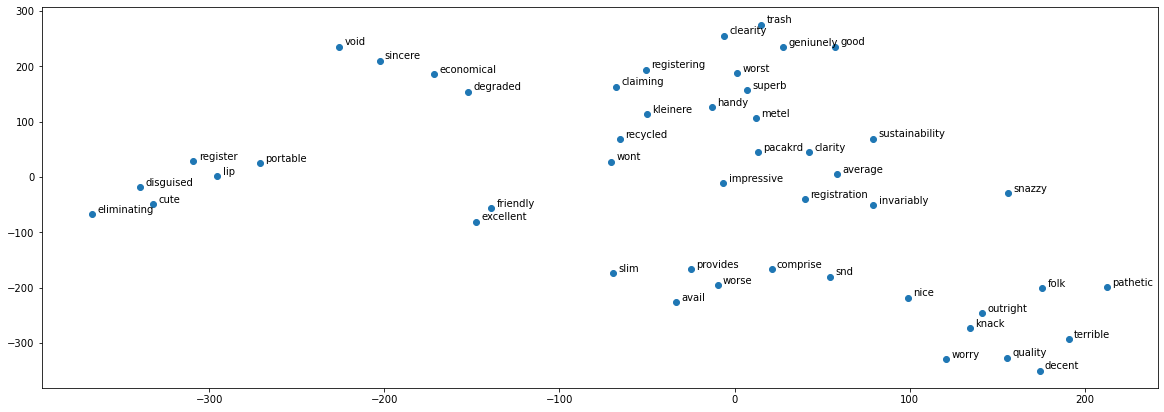

In [61]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()


## 9.3 Word Algebra
**Since Word2Vec characterizes words into quantified tokens, we can consequently add or subtract word vectors together. To add is to combine the meaning of the components and to subtract is to take out the context of one token from another. The following are examples of this vector algebra and their similarity scores:**

**Checking quality + friendly**

In [62]:
word_vec.wv.most_similar(positive=["quality", "friendly"], \
                      negative=[], topn=3)

[('specially', 0.6494502425193787),
 ('according', 0.6412560343742371),
 ('provides', 0.6307406425476074)]

**Checking sell - worry**

In [63]:
word_vec.wv.most_similar(positive=["sell"], \
                      negative=["worry"], topn=3)

[('selling', 0.6644159555435181),
 ('sold', 0.6602786779403687),
 ('appario', 0.6313495635986328)]

In [64]:
word_vec.wv.most_similar(positive=["sell"], \
                      negative=["void"], topn=3)

[('smary', 0.5486752390861511),
 ('ripping', 0.5354102253913879),
 ('trust', 0.5230231881141663)]

## 9.4 Topic Modeling
**Because Latent Dirichlet Allocation (LDA) can cluster documents together according to topic, the reviews can be classified and grouped according to the type of product they correspond to. The product reviews will have weights assigned to each of the topic and the topics themselves will have weights on every token. As it is a clustering-based model, LDA is unsupervised and only the num_topics is configurable.
The following are the top five words that are salient to the first group of product reviews.**

In [65]:
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

good 0.016396241
quality 0.0146133
headphone 0.01242998
product 0.011841173
sound 0.010846581
Wall time: 2min 4s


In [66]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 good, 0.016396241262555122
 quality, 0.014613299630582333
 headphone, 0.012429979629814625
 product, 0.01184117328375578
 sound, 0.010846581310033798

Topic 2:
 watch, 0.028374483808875084
 battery, 0.01590447872877121
 time, 0.012209572829306126
 power, 0.011819430626928806
 good, 0.01035197451710701

Topic 3:
 good, 0.0182026494294405
 product, 0.015542419627308846
 laptop, 0.012914628721773624
 quality, 0.010851173661649227
 one, 0.009496647864580154

Topic 4:
 speed, 0.027910085394978523
 gb, 0.018971988931298256
 card, 0.016474101692438126
 mbps, 0.015713946893811226
 drive, 0.01160153467208147

Topic 5:
 good, 0.01861025206744671
 quality, 0.012315507046878338
 product, 0.011801877059042454
 sound, 0.010466610081493855
 case, 0.009896213188767433

Topic 6:
 product, 0.030525723472237587
 mouse, 0.02174522541463375
 keyboard, 0.013371586799621582
 working, 0.01296140719205141
 one, 0.01133288349956274

Topic 7:
 watch, 0.02054823376238346
 good, 0.017445363104343414
 ac

# 10. Dealing with Target Variable

**As we have seen that our target Variable have rating of customer in string from 5 star to 1 star rating.To convert our target variable in binary we can classify 5 and 4 star rating as 1 means good rating and rest are 0 i.e. bad rating.**

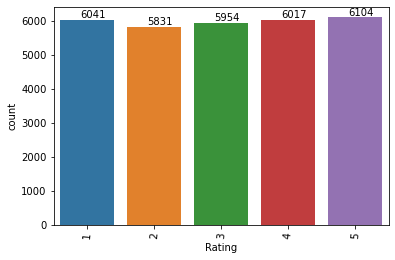

In [190]:
s=sns.countplot(y)
s.set_xticklabels(s.get_xticklabels(),rotation=85);
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")


In [ ]:
model_df["label"]=data["Rating"].replace(["5Star","4Star","3Star","2Star","1Star"],[1,1,0,0,0])

In [193]:
y=model_df["label"]

In [70]:
x=model_df.drop("label",axis=1)

# 11. Principal Component Analysis

**Principal Component Analysis (PCA) is a dimensionality reduction technique that we can use on our model to reduce it.This will help visualize if there is a clear decision boundary along the rating classifications. The more datapoints belonging to the same class are clustered together, the higher the likelihood that our machine learning model is simpler and more effective**

In [71]:
model_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.445484,-0.001895,-0.203527,0.344142,0.070502,0.240880,-0.077178,0.237511,-0.790035,-0.189436,...,-0.166893,0.210722,-0.384289,0.107020,-0.078624,0.347643,-0.247455,0.110727,0.106093,5
1,-1.032677,0.163413,-1.207010,0.229303,0.513271,-0.765113,0.610805,0.161684,-0.119300,1.037042,...,1.641579,0.040024,-0.839362,0.266687,0.593896,-0.292597,1.439445,0.955465,0.507008,5
2,-0.504181,0.350396,0.148510,0.259814,0.881799,0.180270,-0.292371,0.278215,-1.212278,-0.326485,...,0.460669,0.417710,0.125347,-0.029067,0.685257,0.610894,-0.390338,-0.323587,-0.405578,3
3,-1.279863,-0.196911,-0.438239,1.618112,1.879469,-1.028546,-0.027506,0.810349,-1.361032,-1.842277,...,-0.860773,0.381214,-0.245065,-0.544708,0.239802,-0.759939,-0.074139,-0.564063,-1.053148,5
4,-0.057469,0.397085,-0.082694,0.484723,0.496277,-0.230559,0.408131,0.618390,-0.317502,-0.554280,...,-0.175436,0.506088,-0.131352,-0.785390,-0.183912,0.663407,-0.051964,0.555673,-0.407574,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29942,0.293343,0.334126,0.111984,-0.032711,-0.138791,0.624539,0.653729,0.205050,-0.177388,-0.068719,...,-0.050624,-0.134468,-0.042244,0.056015,-0.092656,0.510084,-0.094474,-0.374543,-0.565295,1
29943,0.159981,0.788363,0.013281,-0.550001,-0.182482,-0.222936,0.626784,0.096170,-0.212149,-0.504892,...,0.269644,-0.111696,-0.068136,0.095968,0.158303,0.010906,-0.011988,0.194213,-0.499082,1
29944,-1.091897,-0.512510,0.231506,0.336609,1.005048,0.440355,-0.357036,0.876452,-1.511787,-1.285634,...,-0.485927,1.168319,0.668531,0.153705,0.386780,1.108599,0.255725,-0.357790,-0.634701,1
29945,0.255030,1.217002,0.580287,-0.882239,0.508723,-0.391799,1.272764,0.103661,0.514124,-0.695741,...,0.876095,0.404816,-0.004050,0.106043,0.366251,-0.394855,-1.229945,0.577108,-0.948983,1


In [72]:
pca_df = model_df.dropna(axis=0)

In [85]:
pca_df["label"]=pca_df["label"].replace([5,4,3,2,1],[1,1,0,0,0])

In [86]:
pca_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.445484,-0.001895,-0.203527,0.344142,0.070502,0.240880,-0.077178,0.237511,-0.790035,-0.189436,...,-0.166893,0.210722,-0.384289,0.107020,-0.078624,0.347643,-0.247455,0.110727,0.106093,1
1,-1.032677,0.163413,-1.207010,0.229303,0.513271,-0.765113,0.610805,0.161684,-0.119300,1.037042,...,1.641579,0.040024,-0.839362,0.266687,0.593896,-0.292597,1.439445,0.955465,0.507008,1
2,-0.504181,0.350396,0.148510,0.259814,0.881799,0.180270,-0.292371,0.278215,-1.212278,-0.326485,...,0.460669,0.417710,0.125347,-0.029067,0.685257,0.610894,-0.390338,-0.323587,-0.405578,0
3,-1.279863,-0.196911,-0.438239,1.618112,1.879469,-1.028546,-0.027506,0.810349,-1.361032,-1.842277,...,-0.860773,0.381214,-0.245065,-0.544708,0.239802,-0.759939,-0.074139,-0.564063,-1.053148,1
4,-0.057469,0.397085,-0.082694,0.484723,0.496277,-0.230559,0.408131,0.618390,-0.317502,-0.554280,...,-0.175436,0.506088,-0.131352,-0.785390,-0.183912,0.663407,-0.051964,0.555673,-0.407574,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29942,0.293343,0.334126,0.111984,-0.032711,-0.138791,0.624539,0.653729,0.205050,-0.177388,-0.068719,...,-0.050624,-0.134468,-0.042244,0.056015,-0.092656,0.510084,-0.094474,-0.374543,-0.565295,0
29943,0.159981,0.788363,0.013281,-0.550001,-0.182482,-0.222936,0.626784,0.096170,-0.212149,-0.504892,...,0.269644,-0.111696,-0.068136,0.095968,0.158303,0.010906,-0.011988,0.194213,-0.499082,0
29944,-1.091897,-0.512510,0.231506,0.336609,1.005048,0.440355,-0.357036,0.876452,-1.511787,-1.285634,...,-0.485927,1.168319,0.668531,0.153705,0.386780,1.108599,0.255725,-0.357790,-0.634701,0
29945,0.255030,1.217002,0.580287,-0.882239,0.508723,-0.391799,1.272764,0.103661,0.514124,-0.695741,...,0.876095,0.404816,-0.004050,0.106043,0.366251,-0.394855,-1.229945,0.577108,-0.948983,0


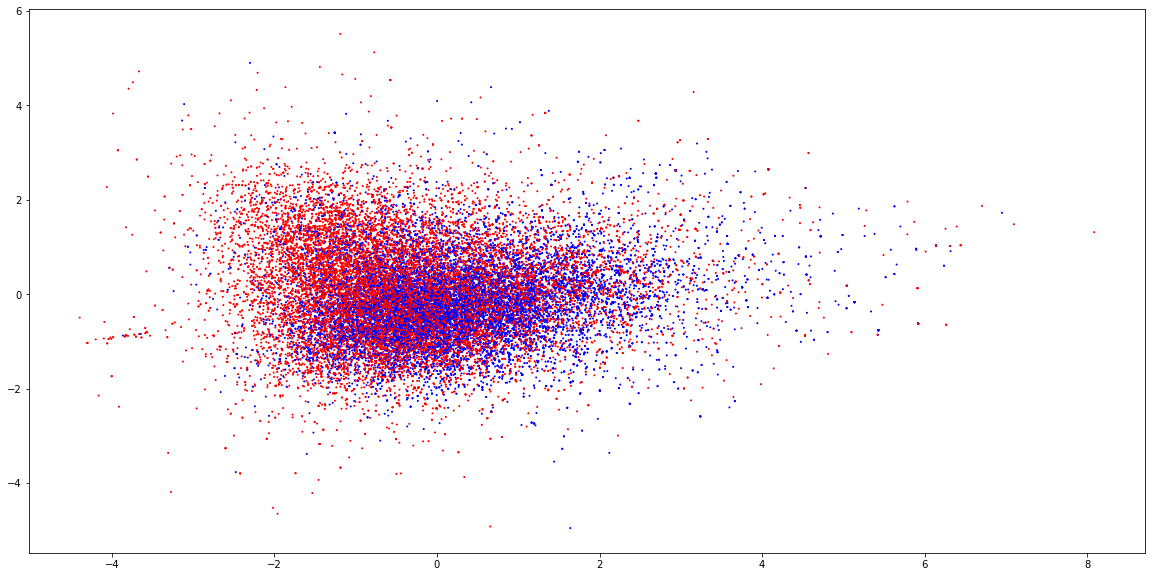

In [88]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

x_axis = pca[:,0]y_axis = pca[:,1]
color_map = pca_df["label"].map({0:"red",1:"blue"})

f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis,color=color_map, s=1)
plt.show()

# 12. Model Training

## 12.1 Spliting Dataset

In [117]:
model_df["label"]=model_df["label"].replace([5,4,3,2,1],[1,1,0,0,0])

In [118]:
y=model_df["label"]

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

## 12.1 GaussianNB

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
gnb=GaussianNB()

In [123]:
gnb.fit(X_train,y_train)

GaussianNB()

### 12.1.1 Evaluation Matrix

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

In [125]:
y_pred=gnb.predict(X_test)

In [126]:
gnb_score=accuracy_score(y_test,y_pred)

In [127]:
gnb_score

0.6670005564830273

In [128]:
confusion_matrix(y_test,y_pred)

array([[3285, 2092],
       [ 900, 2708]], dtype=int64)

GaussianNM


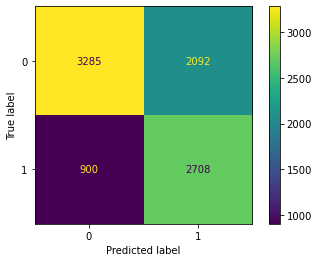

In [129]:
print("GaussianNM")
plot_confusion_matrix(gnb,X_test,y_test,values_format=".6g");

### 12.1.2 Checking score with CV

In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
for j in range(2,15):
    gnb_score=cross_val_score(gnb,X_train,y_train,cv=j)
    gnb_s=gnb_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",gnb_score*100)
    print("Accuracy Score:",gnb_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [67.87520275 66.54899342]
Accuracy Score: 67.21209808224407


AT CV :- 3
Cross Validation score is: [67.54436176 66.5951052  67.35365679]
Accuracy Score: 67.16437458318958


AT CV :- 4
Cross Validation score is: [66.74298798 68.26941423 67.04198473 66.87022901]
Accuracy Score: 67.23115398844402


AT CV :- 5
Cross Validation score is: [66.92105891 68.66205581 66.07824427 67.81965649 67.22328244]
Accuracy Score: 67.34085958422162


AT CV :- 6
Cross Validation score is: [66.57126503 68.11677161 67.88780767 65.97023469 67.53507014 67.39192671]
Accuracy Score: 67.2455126405672


AT CV :- 7
Cross Validation score is: [66.74457429 67.84641068 67.94657763 66.11018364 68.16967268 66.63326653
 68.03607214]
Accuracy Score: 67.35525108568358


AT CV :- 8
Cross Validation score is: [66.53948874 66.92102251 69.38931298 66.94656489 65.19083969 69.04580153
 66.03053435 68.09160305]
Accuracy Score: 67.26939596797446


AT CV :- 9
Cross Validation score is: [66.39484

In [132]:
cross_val_score(gnb,x,y,cv=14)

array([0.64953271, 0.6573165 , 0.66012155, 0.67554932, 0.64749883,
       0.66619916, 0.69658719, 0.66479663, 0.66152408, 0.69097709,
       0.66339411, 0.68817204, 0.67321178, 0.67087424])

In [133]:
gnb_cv_score=cross_val_score(gnb,x,y,cv=14).mean()

In [134]:
gnb_cv_score

0.6689825174410513

In [135]:
gnb_acc_score=accuracy_score(y_test,y_pred)

In [136]:
gnb_acc_score

0.6670005564830273

## 12.2 Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
lr=LogisticRegression()

In [139]:
lr.fit(X_train,y_train)

LogisticRegression()

### 12.2.1 Evaluation Matrix

In [140]:
y_pred=lr.predict(X_test)

In [141]:
lr_acc_score=accuracy_score(y_test,y_pred)

In [142]:
lr_acc_score

0.7612687813021702

In [143]:
confusion_matrix(y_test,y_pred)

array([[4480,  897],
       [1248, 2360]], dtype=int64)

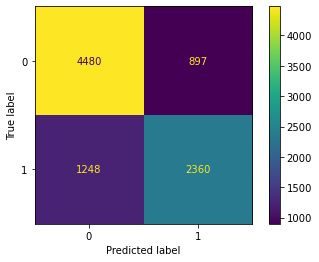

In [144]:
plot_confusion_matrix(lr,X_test,y_test,values_format=".6g")

### 12.2.2 Checking score with CV

In [145]:
for j in range(2,15):
    lr_score=cross_val_score(lr,X_train,y_train,cv=j)
    lr_s=lr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",lr_score*100)
    print("Accuracy Score:",lr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [75.23137105 75.81337659]
Accuracy Score: 75.52237381929206


AT CV :- 3
Cross Validation score is: [75.35775615 75.5689137  75.96965794]
Accuracy Score: 75.6321092621462


AT CV :- 4
Cross Validation score is: [75.5580996  75.44361763 75.6870229  75.66793893]
Accuracy Score: 75.58916976539936


AT CV :- 5
Cross Validation score is: [76.19842595 75.48294777 75.28625954 76.04961832 75.97805344]
Accuracy Score: 75.79906100316232


AT CV :- 6
Cross Validation score is: [75.78706354 75.15741271 76.01602748 75.32913566 75.52247352 76.03778987]
Accuracy Score: 75.64165046095134


AT CV :- 7
Cross Validation score is: [76.06010017 74.92487479 76.16026711 75.0918197  77.02070808 74.91649967
 76.15230461]
Accuracy Score: 75.76093916109507


AT CV :- 8
Cross Validation score is: [75.96337276 75.65814575 76.29770992 75.30534351 75.03816794 76.29770992
 75.41984733 76.22137405]
Accuracy Score: 75.77520889701792


AT CV :- 9
Cross Validation score is: [75.75107

In [146]:
cross_val_score(lr,X_train,y_train,cv=7)

array([0.760601  , 0.74924875, 0.76160267, 0.7509182 , 0.77020708,
       0.749165  , 0.76152305])

In [147]:
lr_cv_score=cross_val_score(lr,X_train,y_train,cv=7).mean()

In [148]:
lr_cv_score

0.7576093916109506

In [149]:
lr_acc_score

0.7612687813021702

## 12.3 Random Forest 

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc=RandomForestClassifier()

### 12.3.1 Evaluation Matrix

In [152]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [153]:
y_pred=rfc.predict(X_test)

In [154]:
rfc_acc_score=accuracy_score(y_test,y_pred)

In [155]:
rfc_acc_score

0.8438508625486922

In [156]:
confusion_matrix(y_test,y_pred)

array([[4854,  523],
       [ 880, 2728]], dtype=int64)

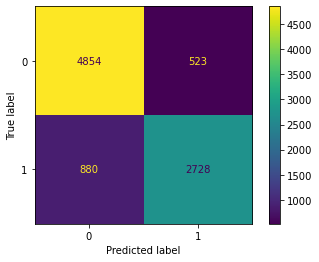

In [157]:
plot_confusion_matrix(rfc,X_test,y_test,values_format=".6g")

### 12.3.2 Checking score with CV

In [158]:
for j in range(2,15):
    rfc_score=cross_val_score(rfc,X_train,y_train,cv=j)
    rfc_s=rfc_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",rfc_score*100)
    print("Accuracy Score:",rfc_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [80.03053144 80.21181185]
Accuracy Score: 80.12117164392711


AT CV :- 3
Cross Validation score is: [81.38236978 82.32431659 82.18119365]
Accuracy Score: 81.96262667001685


AT CV :- 4
Cross Validation score is: [82.29345545 82.63690135 82.63358779 82.91984733]
Accuracy Score: 82.6209479791602


AT CV :- 5
Cross Validation score is: [82.06534701 83.30550918 82.37118321 83.77862595 82.51431298]
Accuracy Score: 82.80699566525817


AT CV :- 6
Cross Validation score is: [81.4825415  83.97252433 82.85632513 84.02976531 83.42399084 82.4792442 ]
Accuracy Score: 83.04073188489988


AT CV :- 7
Cross Validation score is: [82.20367279 82.93823038 82.30383973 83.20534224 84.10153641 84.06813627
 82.73213093]
Accuracy Score: 83.07898410701678


AT CV :- 8
Cross Validation score is: [81.99160626 83.44143457 84.19847328 83.12977099 83.28244275 83.39694656
 84.1221374  83.09160305]
Accuracy Score: 83.33180185873931


AT CV :- 9
Cross Validation score is: [82.70386

In [159]:
cross_val_score(rfc,X_train,y_train,cv=10)

array([0.83118741, 0.83452551, 0.84685115, 0.84064885, 0.82347328,
       0.83874046, 0.84398855, 0.83110687, 0.83062977, 0.83587786])

In [160]:
rfc_cv_score=cross_val_score(rfc,X_train,y_train,cv=10).mean()

In [161]:
rfc_cv_score

0.837324767843557

In [162]:
rfc_acc_score=accuracy_score(y_test,y_pred)

In [163]:
rfc_acc_score

0.8438508625486922

## 12.4 Gradient Boosting Classifier

In [227]:
from sklearn.ensemble import GradientBoostingClassifier

In [228]:
gbc=GradientBoostingClassifier()

### 12.4.1 Evaluation Matrix

In [229]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [230]:
y_pred=gbc.predict(X_test)

In [231]:
gbc_acc_score=accuracy_score(y_pred,y_test)

In [232]:
gbc_acc_score

0.7646076794657763

In [233]:
confusion_matrix(y_pred,y_test)

array([[4437, 1175],
       [ 940, 2433]], dtype=int64)

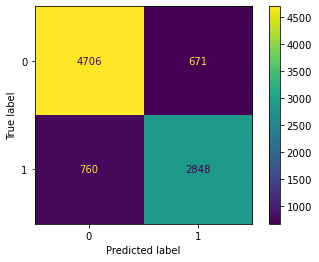

In [234]:
plot_confusion_matrix(xgb,X_test,y_test,values_format=".6g")

### 12.4.2 Checking Score with CV

In [236]:
for j in range(2,15):
    gbc_score=cross_val_score(gbc,X_train,y_train,cv=j)
    gbc_s=gbc_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",gbc_score*100)
    print("Accuracy Score:",gbc_s*100)
    print("\n")


AT CV :- 2
Cross Validation score is: [75.994657   76.19501956]
Accuracy Score: 76.0948382787902


AT CV :- 3
Cross Validation score is: [75.98740698 76.313153   76.84270789]
Accuracy Score: 76.38108928929998


AT CV :- 4
Cross Validation score is: [75.48177829 76.49303568 76.31679389 76.75572519]
Accuracy Score: 76.26183326269242


AT CV :- 5
Cross Validation score is: [75.57834486 76.17457668 76.3120229  77.3139313  76.93225191]
Accuracy Score: 76.46222552855268


AT CV :- 6
Cross Validation score is: [75.27189468 76.07326846 76.04464797 76.64567831 77.03979387 76.12367592]
Accuracy Score: 76.1998265345257


AT CV :- 7
Cross Validation score is: [75.29215359 75.25876461 75.92654424 76.52754591 77.82231129 76.85370741
 76.72010688]
Accuracy Score: 76.34301913310682


AT CV :- 8
Cross Validation score is: [75.69629912 75.92521938 76.94656489 76.52671756 75.91603053 77.02290076
 76.87022901 76.98473282]
Accuracy Score: 76.48608675961334


AT CV :- 9
Cross Validation score is: [75.922746

In [237]:
cross_val_score(gbc,X_train,y_train,cv=14)

array([0.76568758, 0.75567423, 0.77436582, 0.75233645, 0.76486306,
       0.75617902, 0.76887108, 0.748831  , 0.77020708, 0.77822311,
       0.75751503, 0.78289913, 0.75350701, 0.77755511])

In [238]:
gbc_cv_score=cross_val_score(gbc,X_train,y_train,cv=14).mean()

In [239]:
gbc_acc_score=accuracy_score(y_pred,y_test)

In [240]:
gbc_acc_score

0.7646076794657763

In [241]:
gbc_cv_score

0.7647653371464144

# 13.Choose the best model with ROC AUC Curve

In [242]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [243]:
lr_pred=lr.predict(X_test)
gnb_pred=gnb.predict(X_test)
rfc_pred=rfc.predict(X_test)
gbc_pred=gbc.predict(X_test)

In [244]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lr_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, gnb_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rfc_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, gbc_pred, pos_label=1)

In [245]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [246]:
# auc scores
auc_score_lr = roc_auc_score(y_test, lr_pred)
auc_score_gnb = roc_auc_score(y_test, gnb_pred)
auc_score_rfc = roc_auc_score(y_test, rfc_pred)
auc_score_gbc = roc_auc_score(y_test, gbc_pred)
print(round(auc_score_lr,2)*100,round(auc_score_gnb,2)*100, round(auc_score_rfc,2)*100,round(auc_score_gbc,2)*100)

74.0 68.0 83.0 75.0


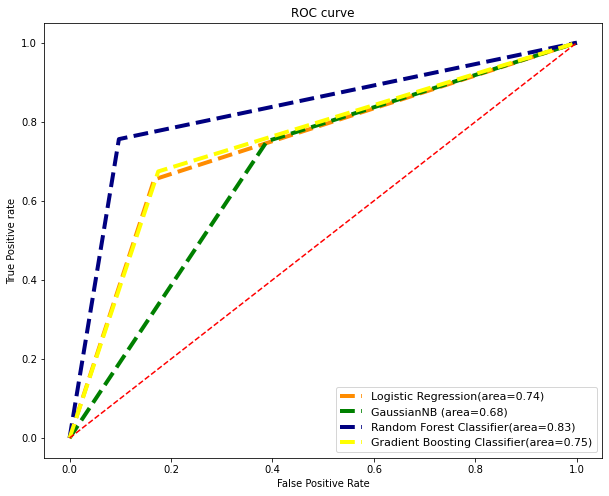

In [255]:
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1, linestyle='--',color='darkorange',linewidth=4, label='Logistic Regression(area=%0.2f)'% auc_score_lr)
plt.plot(fpr2, tpr2, linestyle='--',color='green',linewidth=4, label='GaussianNB (area=%0.2f)'% auc_score_gnb)
plt.plot(fpr3,tpr3,linestyle='--',color='navy',linewidth=4, label='Random Forest Classifier(area=%0.2f)'% auc_score_rfc)
plt.plot(fpr4,tpr4,linestyle='--',color='yellow',linewidth=4, label='Gradient Boosting Classifier(area=%0.2f)'% auc_score_gbc)



plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(prop={'size':11},loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();

# 14.Choosing best model by checking cross validation score

In [256]:
GaussianNB={"Accuracy Score":(gnb_acc_score,2),
                    "CV Score":(gnb_cv_score,2),
                    "Difference":gnb_acc_score-gnb_cv_score}
Logistic_Regression={"Accuracy Score":(lr_acc_score,2),
                    "CV Score":(lr_cv_score,2),
                    "Difference":lr_acc_score-lr_cv_score}
Random_Forest_Classifier={"Accuracy Score":(rfc_acc_score,2),
                    "CV Score":(rfc_cv_score,2),
                    "Difference":rfc_acc_score-rfc_cv_score}
Gradient_Boosting_Classifier={"Accuracy Score":(gbc_acc_score,2),
                    "CV Score":(gbc_cv_score,2),
                    "Difference":gbc_acc_score-gbc_cv_score}


In [257]:
data=np.array([[lr_acc_score,lr_cv_score,lr_acc_score-lr_cv_score],[gnb_acc_score,gnb_cv_score,gnb_acc_score-gnb_cv_score],[rfc_acc_score,rfc_cv_score,rfc_acc_score-rfc_cv_score],[gbc_acc_score,gbc_cv_score,gbc_acc_score-gbc_cv_score]])

In [258]:
index_value=["Logistic Regression","GaussianNB","Random Forest Classifier","Gradient Boosting Classifier"]

In [259]:
columns_value=["Accuracy Score","Cross Validation Score","Difference"]

In [260]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [261]:
model_selection

,Accuracy Score,Cross Validation Score,Difference
Logistic Regression,0.761269,0.757609,0.003659
GaussianNB,0.667001,0.668983,-0.001982
Random Forest Classifier,0.843851,0.837325,0.006526
Gradient Boosting Classifier,0.764608,0.764765,-0.000158


**As we can see that Gradient Boosting algorithm is providing the better result in Cross validation and less error.**

# 15. Saving the Model

In [268]:
import pickle
filename="Rating_pred_nlp.pkl"
pickle.dump(gbc,open(filename,"wb"))

In [69]:
pip install wordcloud

In [43]:
data["Rating"]=data["Rating"].replace(["5Star","4Star","3Star","2Star","1Star"],[5,4,3,2,1])

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

five_star_rating = " ".join(data[data["Rating"]==5]["Review"].values).lower()
four_star_rating = " ".join(data[data["Rating"]==4]["Review"].values).lower()
three_star_rating = " ".join(data[data["Rating"]==3]["Review"].values).lower()
two_star_rating = " ".join(data[data["Rating"]==2]["Review"].values).lower()
one_star_rating = " ".join(data[data["Rating"]==1]["Review"].values).lower()

text_list = [one_star_rating,two_star_rating,three_star_rating,four_star_rating,five_star_rating]



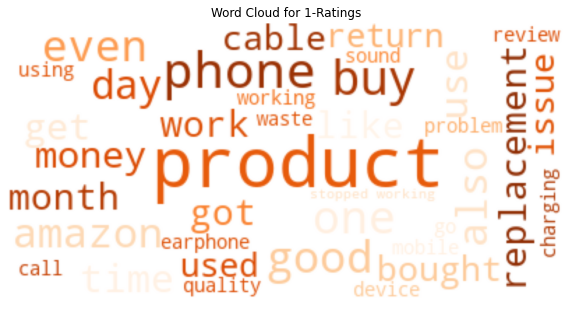

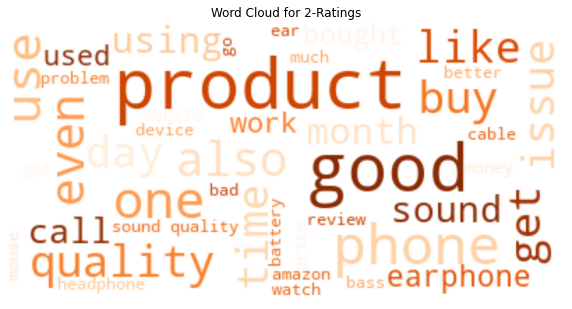

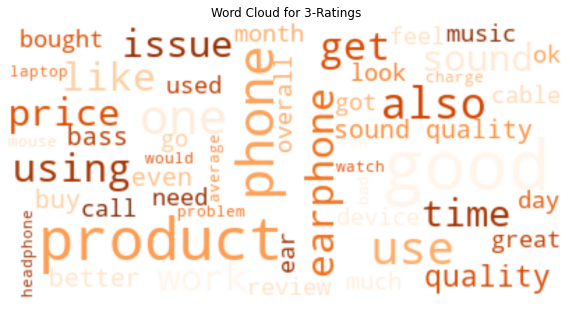

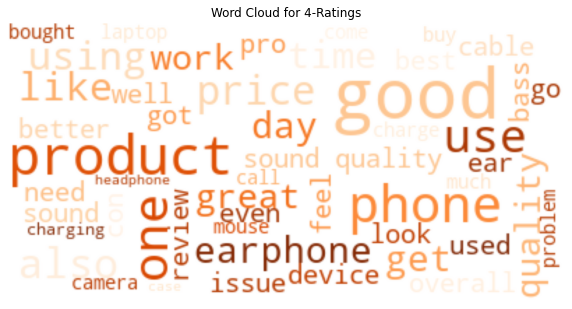

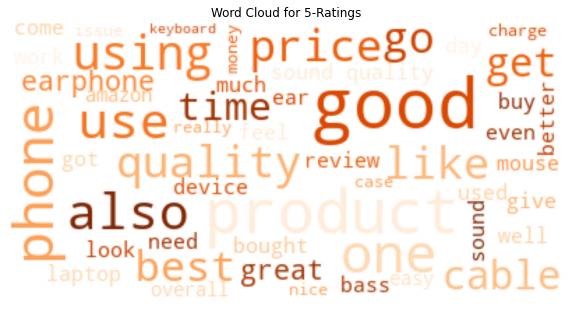

In [59]:
for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="gaussian")
    plt.title(f"Word Cloud for {index+1}-Ratings")
    plt.axis("off")
    plt.show()